# Import Some Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import json

# Get Data From API's

In [2]:
df1 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data1.csv')
df1

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num Cases
0,1.0,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,...,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1
1,2.0,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,...,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1
2,3.0,KL-KS-P1,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,...,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,1
3,4.0,DL-P1,02/03/2020,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,...,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,1
4,5.0,TS-P1,02/03/2020,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,...,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17359,NaN,NaN,16/04/2020,NaN,NaN,NaN,NaN,NaN,Maharashtra,MH,...,Correction for district count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2
17360,NaN,NaN,18/04/2020,NaN,NaN,NaN,NaN,Nagpur,Maharashtra,MH,...,Correction for district count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
17361,NaN,NaN,18/04/2020,NaN,NaN,NaN,NaN,NaN,Maharashtra,MH,...,Correction for district count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
17362,NaN,NaN,19/04/2020,NaN,NaN,NaN,NaN,Nagpur,Maharashtra,MH,...,Correction for district count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [3]:
df1 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data1.csv')
df2 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data2.csv')
df3 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data3.csv')
df4 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data4.csv')
df5 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data5.csv')
df6 = pd.read_csv('https://api.covid19india.org/csv/latest/raw_data6.csv')


# Inspect All DataFrame

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17364 entries, 0 to 17363
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Patient Number                             17306 non-null  float64
 1   State Patient Number                       2457 non-null   object 
 2   Date Announced                             17364 non-null  object 
 3   Estimated Onset Date                       0 non-null      float64
 4   Age Bracket                                1670 non-null   object 
 5   Gender                                     3746 non-null   object 
 6   Detected City                              2166 non-null   object 
 7   Detected District                          14978 non-null  object 
 8   Detected State                             17363 non-null  object 
 9   State code                                 17363 non-null  object 
 10  Current Status        

# Check All The Columns

In [5]:
df1.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Estimated Onset Date', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Notes', 'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes', 'Num Cases'],
      dtype='object')

In [153]:
df2.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Estimated Onset Date', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Notes', 'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes', 'Num Cases'],
      dtype='object')

In [154]:
df3.columns

Index(['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Num Cases', 'Current Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

# Retain Necessary Columns

In [155]:
df1 = df1.loc[:,['Num Cases', 'Date Announced', 'Age Bracket','Gender','Detected City','Detected District', 'Detected State', 'Current Status']]
df2 = df2.loc[:,['Num Cases', 'Date Announced', 'Age Bracket','Gender','Detected City','Detected District', 'Detected State', 'Current Status']]
df3 = df3.loc[:,['Num Cases', 'Date Announced', 'Age Bracket','Gender','Detected City','Detected District', 'Detected State', 'Current Status']]
df4 = df4.loc[:,['Num Cases', 'Date Announced', 'Age Bracket','Gender','Detected City','Detected District', 'Detected State', 'Current Status']]
df5 = df5.loc[:,['Num Cases', 'Date Announced', 'Age Bracket','Gender','Detected City','Detected District', 'Detected State', 'Current Status']]
df6 = df6.loc[:,['Num Cases', 'Date Announced', 'Age Bracket','Gender','Detected City','Detected District', 'Detected State', 'Current Status']]

# Merge All The Data Frame's

In [156]:
df = df1.append([df2,df3,df4,df5,df6])

In [157]:
df

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered
...,...,...,...,...,...,...,...,...
23418,1.0,19/06/2020,NaN,NaN,NaN,Pulwama,Jammu and Kashmir,Hospitalized
23419,2.0,19/06/2020,NaN,NaN,NaN,Reasi,Jammu and Kashmir,Recovered
23420,-2.0,19/06/2020,NaN,NaN,NaN,Kishtwar,Jammu and Kashmir,Recovered
23421,-3.0,19/06/2020,NaN,NaN,NaN,East Sikkim,Sikkim,Recovered


# Making Separate Columns For Day, Month and Year

In [158]:
DATE = df['Date Announced'].str.split('/',expand=True)
DATE.columns=['Day', 'Month', 'Year']
DATE

,Day,Month,Year
0,30,01,2020
1,02,02,2020
2,03,02,2020
3,02,03,2020
4,02,03,2020
...,...,...,...
23418,19,06,2020
23419,19,06,2020
23420,19,06,2020
23421,19,06,2020


# Concatinate both the Data Frame's along axis = 1

In [159]:
df = pd.concat([df,DATE],axis=1)
df

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,01,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,02,02,2020
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,03,02,2020
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,02,03,2020
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,02,03,2020
...,...,...,...,...,...,...,...,...,...,...,...
23418,1.0,19/06/2020,NaN,NaN,NaN,Pulwama,Jammu and Kashmir,Hospitalized,19,06,2020
23419,2.0,19/06/2020,NaN,NaN,NaN,Reasi,Jammu and Kashmir,Recovered,19,06,2020
23420,-2.0,19/06/2020,NaN,NaN,NaN,Kishtwar,Jammu and Kashmir,Recovered,19,06,2020
23421,-3.0,19/06/2020,NaN,NaN,NaN,East Sikkim,Sikkim,Recovered,19,06,2020


# Save all the data in CSV Format`

In [160]:
df.to_csv('Covid19India.csv')

# Final Dataset

In [161]:
df

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,01,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,02,02,2020
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,03,02,2020
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,02,03,2020
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,02,03,2020
...,...,...,...,...,...,...,...,...,...,...,...
23418,1.0,19/06/2020,NaN,NaN,NaN,Pulwama,Jammu and Kashmir,Hospitalized,19,06,2020
23419,2.0,19/06/2020,NaN,NaN,NaN,Reasi,Jammu and Kashmir,Recovered,19,06,2020
23420,-2.0,19/06/2020,NaN,NaN,NaN,Kishtwar,Jammu and Kashmir,Recovered,19,06,2020
23421,-3.0,19/06/2020,NaN,NaN,NaN,East Sikkim,Sikkim,Recovered,19,06,2020


# Import Libraries

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read CSV File

In [163]:
df = pd.read_csv('Covid19India.csv')
df

,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
100279,23418,1.0,19/06/2020,NaN,NaN,NaN,Pulwama,Jammu and Kashmir,Hospitalized,19,6,2020
100280,23419,2.0,19/06/2020,NaN,NaN,NaN,Reasi,Jammu and Kashmir,Recovered,19,6,2020
100281,23420,-2.0,19/06/2020,NaN,NaN,NaN,Kishtwar,Jammu and Kashmir,Recovered,19,6,2020
100282,23421,-3.0,19/06/2020,NaN,NaN,NaN,East Sikkim,Sikkim,Recovered,19,6,2020


In [164]:
data = df.iloc[:,1:]
data

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...
100279,1.0,19/06/2020,NaN,NaN,NaN,Pulwama,Jammu and Kashmir,Hospitalized,19,6,2020
100280,2.0,19/06/2020,NaN,NaN,NaN,Reasi,Jammu and Kashmir,Recovered,19,6,2020
100281,-2.0,19/06/2020,NaN,NaN,NaN,Kishtwar,Jammu and Kashmir,Recovered,19,6,2020
100282,-3.0,19/06/2020,NaN,NaN,NaN,East Sikkim,Sikkim,Recovered,19,6,2020


# Inspect the Data Frame

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100284 entries, 0 to 100283
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Num Cases          100281 non-null  float64
 1   Date Announced     100284 non-null  object 
 2   Age Bracket        37841 non-null   object 
 3   Gender             40548 non-null   object 
 4   Detected City      7850 non-null    object 
 5   Detected District  92399 non-null   object 
 6   Detected State     100275 non-null  object 
 7   Current Status     100282 non-null  object 
 8   Day                100284 non-null  int64  
 9   Month              100284 non-null  int64  
 10  Year               100284 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 8.4+ MB


# Inspect Null Values in Each Column

In [166]:
data.isnull().sum(axis=0).sort_values(ascending=False)/len(data)*100

Detected City        92.172231
Age Bracket          62.266164
Gender               59.566830
Detected District     7.862670
Detected State        0.008975
Num Cases             0.002992
Current Status        0.001994
Year                  0.000000
Month                 0.000000
Day                   0.000000
Date Announced        0.000000
dtype: float64

# Inspect Null Values in Each Row

In [167]:
data.isnull().sum(axis=1).sort_values(ascending=False)/len(data)*100

28451    0.005983
69009    0.005983
69008    0.005983
28834    0.004986
28968    0.004986
           ...   
38256    0.000000
38257    0.000000
38258    0.000000
38259    0.000000
0        0.000000
Length: 100284, dtype: float64

# Total Covid-19 Cases Month Wise

In [168]:
data.groupby('Month')['Num Cases'].sum()

Month
1         1.0
2         2.0
3      1635.0
4     36078.0
5    242853.0
6    335134.0
Name: Num Cases, dtype: float64

In [169]:
M=data[data['Current Status']=='Hospitalized'].groupby('Month')['Num Cases'].sum()
M

Month
3      1431.0
4     33209.0
5    155781.0
6    205186.0
Name: Num Cases, dtype: float64

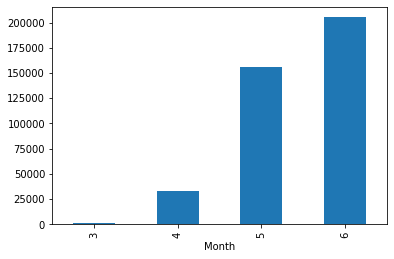

In [170]:
M.plot.bar()
plt.show()

# Total Male/ Female Infected with Coronavirus 

In [171]:
data.groupby('Gender')['Num Cases'].sum()

Gender
F             13838.0
M             27936.0
M                 1.0
Non-Binary        7.0
Name: Num Cases, dtype: float64

# Which age group is Infected most ?

In [172]:
M= data.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=False).head(10)
M

Age Bracket
30.0    1050.0
25.0     905.0
40.0     882.0
35.0     867.0
32.0     806.0
24.0     778.0
45.0     754.0
28.0     722.0
27.0     719.0
26.0     717.0
Name: Num Cases, dtype: float64

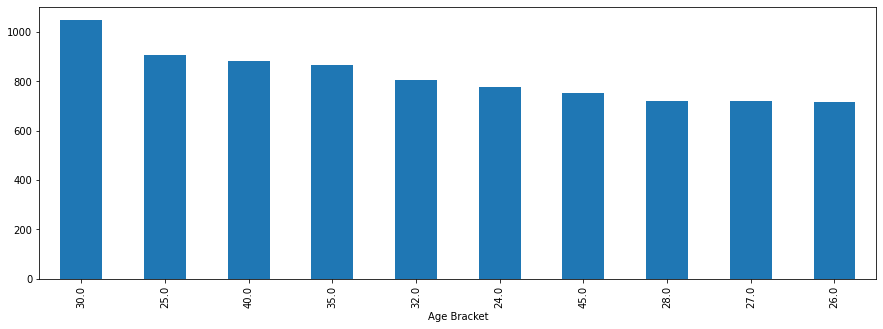

In [173]:
M.plot.bar(figsize=(15,5))
plt.show()

# Check State Wise Total Cases in India

In [174]:
M = data[data['Current Status'] == 'Hospitalized'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)
M

Detected State
Maharashtra                                 124317.0
Tamil Nadu                                   54442.0
Delhi                                        53112.0
Gujarat                                      26193.0
Uttar Pradesh                                16585.0
Rajasthan                                    14152.0
West Bengal                                  13084.0
Madhya Pradesh                               11580.0
Haryana                                       9731.0
State Unassigned                              8927.0
Karnataka                                     8209.0
Andhra Pradesh                                7959.0
Bihar                                         7289.0
Telangana                                     6524.0
Jammu and Kashmir                             5679.0
Assam                                         5006.0
Odisha                                        4676.0
Punjab                                        3830.0
Kerala                         

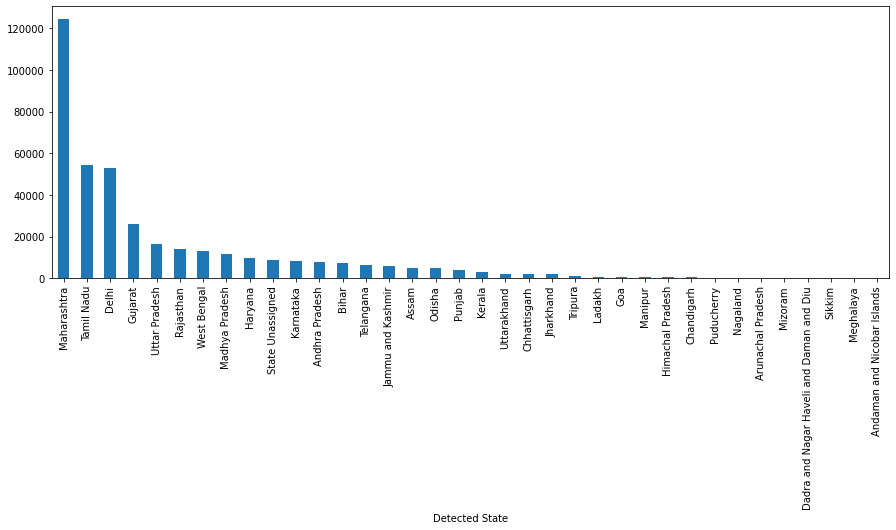

In [175]:
M.plot.bar(figsize=(15,5))
plt.show()

# How many cases Everyday?

In [176]:
Day = data[data['Current Status'] == 'Hospitalized'].groupby(['Month','Day'])[['Num Cases']].sum()
Day

Num Cases
Month Day           
3     4          5.0
      5          1.0
      7          2.0
      9          4.0
      10         4.0
...              ...
6     15     10032.0
      16     11086.0
      17     13108.0
      18     13829.0
      19     14740.0

[106 rows x 1 columns]

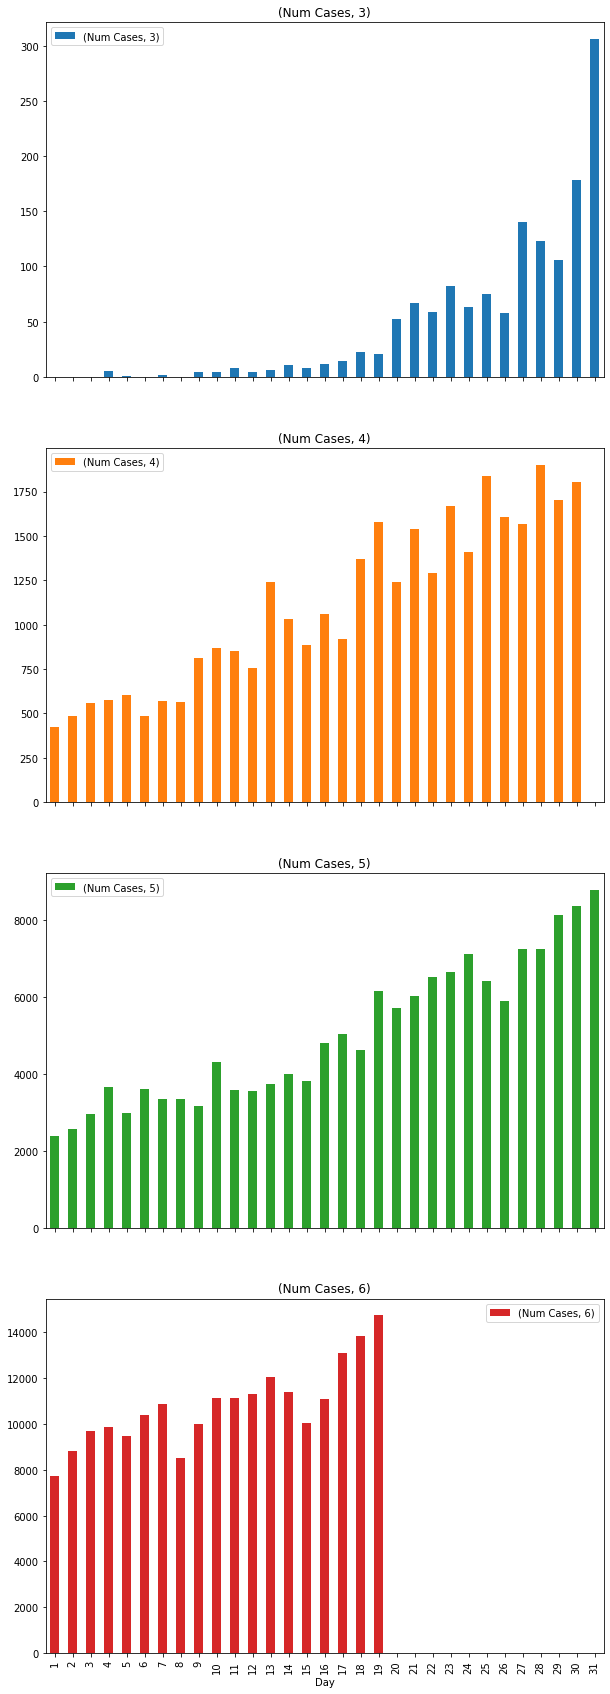

In [177]:
Day.unstack(level=0).plot(kind='bar',subplots=True,figsize=(10,30))
plt.show()

In [178]:
data['Current Status'].unique()

array(['Recovered', 'Hospitalized', 'Deceased', 'Migrated',
       'Migrated_Other', nan], dtype=object)

In [179]:
data[data['Current Status']=='Deceased'].sum()

Num Cases                                                     12133
Date Announced    12/03/202012/03/202013/03/202019/03/202021/03/...
Detected State    DelhiMaharashtraKarnatakaPunjabMaharashtraGuja...
Current Status    DeceasedDeceasedDeceasedDeceasedDeceasedDeceas...
Day                                                           44684
Month                                                         17147
Year                                                        6433700
dtype: object

In [180]:
data[data['Current Status']=='Deceased'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)

Detected State
Maharashtra          5562.0
Delhi                1982.0
Gujarat              1472.0
Tamil Nadu            643.0
West Bengal           512.0
Uttar Pradesh         478.0
Madhya Pradesh        394.0
Rajasthan             293.0
Telangana             174.0
Haryana               141.0
Karnataka             115.0
Punjab                 76.0
Jammu and Kashmir      70.0
Andhra Pradesh         65.0
Bihar                  48.0
Uttarakhand            26.0
Kerala                 21.0
Odisha                 14.0
Chhattisgarh           10.0
Jharkhand               8.0
Assam                   8.0
Puducherry              7.0
Himachal Pradesh        6.0
Chandigarh              6.0
Ladakh                  1.0
Tripura                 1.0
Name: Num Cases, dtype: float64

In [3]:
import plotly.plotly as py
import plotly.tools as tls

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [2]:
!pip install plotl

Using legacy 'setup.py install' for retrying, since package 'wheel' is not installed.
    Running setup.py install for retrying: started
    Running setup.py install for retrying: finished with status 'done'


You should consider upgrading via the 'c:\users\home\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


# Linear Regression

# Import Librarries

In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv('Covid19India.csv')
data

,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
100279,23418,1.0,19/06/2020,NaN,NaN,NaN,Pulwama,Jammu and Kashmir,Hospitalized,19,6,2020
100280,23419,2.0,19/06/2020,NaN,NaN,NaN,Reasi,Jammu and Kashmir,Recovered,19,6,2020
100281,23420,-2.0,19/06/2020,NaN,NaN,NaN,Kishtwar,Jammu and Kashmir,Recovered,19,6,2020
100282,23421,-3.0,19/06/2020,NaN,NaN,NaN,East Sikkim,Sikkim,Recovered,19,6,2020


In [32]:
data = data.iloc[:,1:]
data

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...
100279,1.0,19/06/2020,NaN,NaN,NaN,Pulwama,Jammu and Kashmir,Hospitalized,19,6,2020
100280,2.0,19/06/2020,NaN,NaN,NaN,Reasi,Jammu and Kashmir,Recovered,19,6,2020
100281,-2.0,19/06/2020,NaN,NaN,NaN,Kishtwar,Jammu and Kashmir,Recovered,19,6,2020
100282,-3.0,19/06/2020,NaN,NaN,NaN,East Sikkim,Sikkim,Recovered,19,6,2020


In [33]:
Day = data[data['Current Status'] == 'Deceased'].groupby(['Month', 'Day'])[['Num Cases']].sum()
Day

Num Cases
Month Day           
3     12         2.0
      13         1.0
      19         1.0
      21         3.0
      22         2.0
...              ...
6     15       396.0
      16      2004.0
      17       341.0
      18       343.0
      19       364.0

[80 rows x 1 columns]

In [34]:
x = np.arange(len(Day))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])

In [35]:
y = Day.values
y

array([[2.000e+00],
       [1.000e+00],
       [1.000e+00],
       [3.000e+00],
       [2.000e+00],
       [3.000e+00],
       [1.000e+00],
       [1.000e+00],
       [2.000e+00],
       [2.000e+00],
       [2.000e+00],
       [1.000e+00],
       [1.000e+00],
       [1.000e+00],
       [1.000e+00],
       [4.000e+00],
       [3.000e+00],
       [3.000e+00],
       [3.000e+00],
       [1.000e+00],
       [1.000e+00],
       [1.000e+00],
       [1.000e+00],
       [2.000e+00],
       [1.000e+00],
       [1.000e+00],
       [5.800e+01],
       [6.900e+01],
       [7.100e+01],
       [7.500e+01],
       [7.700e+01],
       [9.200e+01],
       [1.400e+02],
       [1.030e+02],
       [1.280e+02],
       [9.100e+01],
       [1.040e+02],
       [9.700e+01],
       [1.160e+02],
       [1.120e+02],
       [8.100e+01],
       [1.200e+02],
       [1.370e+02],
       [9.700e+01],
       [1.040e+02],
       [1.200e+02],
       [1.520e+02],
       [1.310e+02],
       [1.460e+02],
       [1.340e+02],


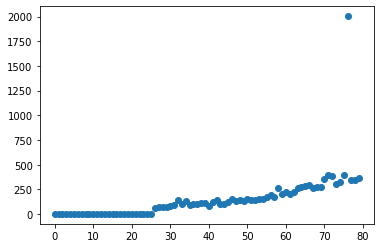

In [36]:
plt.scatter(x,y)
plt.show()

In [37]:
x = x.reshape(-1,1)
x

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [39]:
regressor.predict([[107]])

array([[584.72341772]])

In [40]:
Yp = regressor.predict(x)
Yp

array([[-101.75833333],
       [ -95.34261603],
       [ -88.92689873],
       [ -82.51118143],
       [ -76.09546414],
       [ -69.67974684],
       [ -63.26402954],
       [ -56.84831224],
       [ -50.43259494],
       [ -44.01687764],
       [ -37.60116034],
       [ -31.18544304],
       [ -24.76972574],
       [ -18.35400844],
       [ -11.93829114],
       [  -5.52257384],
       [   0.89314346],
       [   7.30886076],
       [  13.72457806],
       [  20.14029536],
       [  26.55601266],
       [  32.97172996],
       [  39.38744726],
       [  45.80316456],
       [  52.21888186],
       [  58.63459916],
       [  65.05031646],
       [  71.46603376],
       [  77.88175105],
       [  84.29746835],
       [  90.71318565],
       [  97.12890295],
       [ 103.54462025],
       [ 109.96033755],
       [ 116.37605485],
       [ 122.79177215],
       [ 129.20748945],
       [ 135.62320675],
       [ 142.03892405],
       [ 148.45464135],
       [ 154.87035865],
       [ 161.286

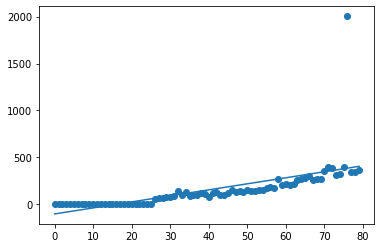

In [41]:
plt.scatter(x,y)
plt.plot(x,Yp)
plt.show()

In [42]:
regressor.score(x,y)*100

38.1118060190085

In [43]:
regressor.intercept_

array([-101.75833333])

In [44]:
regressor.coef_

array([[6.4157173]])

In [45]:
regressor.predict([[107]])

array([[584.72341772]])

# Polynomial Regression

# Import Libraries

In [195]:
data = pd.read_csv('Covid19India.csv')
data

,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
100279,23418,1.0,19/06/2020,NaN,NaN,NaN,Pulwama,Jammu and Kashmir,Hospitalized,19,6,2020
100280,23419,2.0,19/06/2020,NaN,NaN,NaN,Reasi,Jammu and Kashmir,Recovered,19,6,2020
100281,23420,-2.0,19/06/2020,NaN,NaN,NaN,Kishtwar,Jammu and Kashmir,Recovered,19,6,2020
100282,23421,-3.0,19/06/2020,NaN,NaN,NaN,East Sikkim,Sikkim,Recovered,19,6,2020


In [196]:
Day = data[data['Current Status'] == 'Hospitalized'].groupby(['Month', 'Day'])[['Num Cases']].sum()
Day

Num Cases
Month Day           
3     4          5.0
      5          1.0
      7          2.0
      9          4.0
      10         4.0
...              ...
6     15     10032.0
      16     11086.0
      17     13108.0
      18     13829.0
      19     14740.0

[106 rows x 1 columns]

In [197]:
x = np.arange(len(Day))
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105])

In [198]:
y = Day.values
y

array([[5.0000e+00],
       [1.0000e+00],
       [2.0000e+00],
       [4.0000e+00],
       [4.0000e+00],
       [8.0000e+00],
       [4.0000e+00],
       [6.0000e+00],
       [1.1000e+01],
       [8.0000e+00],
       [1.2000e+01],
       [1.4000e+01],
       [2.2000e+01],
       [2.1000e+01],
       [5.2000e+01],
       [6.7000e+01],
       [5.9000e+01],
       [8.2000e+01],
       [6.3000e+01],
       [7.5000e+01],
       [5.8000e+01],
       [1.4000e+02],
       [1.2300e+02],
       [1.0600e+02],
       [1.7800e+02],
       [3.0600e+02],
       [4.2300e+02],
       [4.8500e+02],
       [5.5600e+02],
       [5.7600e+02],
       [6.0600e+02],
       [4.8500e+02],
       [5.7000e+02],
       [5.6300e+02],
       [8.1200e+02],
       [8.7000e+02],
       [8.5300e+02],
       [7.5800e+02],
       [1.2430e+03],
       [1.0310e+03],
       [8.8400e+02],
       [1.0610e+03],
       [9.2200e+02],
       [1.3700e+03],
       [1.5790e+03],
       [1.2390e+03],
       [1.5370e+03],
       [1.292

In [199]:
from sklearn.preprocessing import PolynomialFeatures
Poly = PolynomialFeatures(degree=5)
X = Poly.fit_transform(x.reshape(-1,1))
X


array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01, 2.43000000e+02],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02, 1.02400000e+03],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01, 1.25000000e+02,
        6.25000000e+02, 3.12500000e+03],
       [1.00000000e+00, 6.00000000e+00, 3.60000000e+01, 2.16000000e+02,
        1.29600000e+03, 7.77600000e+03],
       [1.00000000e+00, 7.00000000e+00, 4.90000000e+01, 3.43000000e+02,
        2.40100000e+03, 1.68070000e+04],
       [1.00000000e+00, 8.00000000e+00, 6.40000000e+01, 5.12000000e+02,
        4.09600000e+03, 

In [200]:
pd.DataFrame(X)

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,0.0,0.000000e+00
1,1.0,1.0,1.0,1.0,1.0,1.000000e+00
2,1.0,2.0,4.0,8.0,16.0,3.200000e+01
3,1.0,3.0,9.0,27.0,81.0,2.430000e+02
4,1.0,4.0,16.0,64.0,256.0,1.024000e+03
...,...,...,...,...,...,...
101,1.0,101.0,10201.0,1030301.0,104060401.0,1.051010e+10
102,1.0,102.0,10404.0,1061208.0,108243216.0,1.104081e+10
103,1.0,103.0,10609.0,1092727.0,112550881.0,1.159274e+10
104,1.0,104.0,10816.0,1124864.0,116985856.0,1.216653e+10


In [201]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [202]:
reg.coef_

array([[ 0.00000000e+00,  4.29742727e+00,  3.52034106e-01,
        -5.37306369e-03,  3.07831191e-04, -1.74043924e-06]])

In [203]:
reg.intercept_

array([-41.15002974])

In [204]:
Yp = reg.predict(X)
Yp

array([[-4.11500297e+01],
       [-3.65056353e+01],
       [-3.11851537e+01],
       [-2.52100023e+01],
       [-1.85946285e+01],
       [-1.13467181e+01],
       [-3.46740448e+00],
       [ 5.04852264e+00],
       [ 1.42124085e+01],
       [ 2.40415241e+01],
       [ 3.45588579e+01],
       [ 4.57929063e+01],
       [ 5.77774654e+01],
       [ 7.05514216e+01],
       [ 8.41585432e+01],
       [ 9.86472713e+01],
       [ 1.14070511e+02],
       [ 1.30485423e+02],
       [ 1.47953213e+02],
       [ 1.66538926e+02],
       [ 1.86311234e+02],
       [ 2.07342229e+02],
       [ 2.29707216e+02],
       [ 2.53484498e+02],
       [ 2.78755175e+02],
       [ 3.05602930e+02],
       [ 3.34113821e+02],
       [ 3.64376073e+02],
       [ 3.96479868e+02],
       [ 4.30517138e+02],
       [ 4.66581355e+02],
       [ 5.04767323e+02],
       [ 5.45170965e+02],
       [ 5.87889122e+02],
       [ 6.33019336e+02],
       [ 6.80659648e+02],
       [ 7.30908382e+02],
       [ 7.83863944e+02],
       [ 8.3

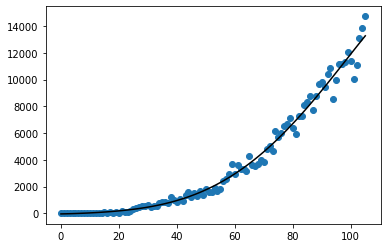

In [205]:
plt.scatter(x,y)
plt.plot(x,Yp,color='k')
plt.show()

In [206]:
reg.score(X,y)*100

98.58763596566682

In [207]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105])

In [208]:
reg.predict(Poly.transform([[250]]))

array([[17274.5630333]])

# Support Vector Regression

# Import Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv('Covid19India.csv')
data

,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
100279,23418,1.0,19/06/2020,NaN,NaN,NaN,Pulwama,Jammu and Kashmir,Hospitalized,19,6,2020
100280,23419,2.0,19/06/2020,NaN,NaN,NaN,Reasi,Jammu and Kashmir,Recovered,19,6,2020
100281,23420,-2.0,19/06/2020,NaN,NaN,NaN,Kishtwar,Jammu and Kashmir,Recovered,19,6,2020
100282,23421,-3.0,19/06/2020,NaN,NaN,NaN,East Sikkim,Sikkim,Recovered,19,6,2020


In [55]:
Day = data[data['Current Status'] == 'Hospitalized'].groupby(['Month', 'Day'])[['Num Cases']].sum()
Day

Num Cases
Month Day           
3     4          5.0
      5          1.0
      7          2.0
      9          4.0
      10         4.0
...              ...
6     15     10032.0
      16     11086.0
      17     13108.0
      18     13829.0
      19     14740.0

[106 rows x 1 columns]

In [59]:
x = np.arange(len(Day))
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105])

In [60]:
y = Day.values
y

array([[5.0000e+00],
       [1.0000e+00],
       [2.0000e+00],
       [4.0000e+00],
       [4.0000e+00],
       [8.0000e+00],
       [4.0000e+00],
       [6.0000e+00],
       [1.1000e+01],
       [8.0000e+00],
       [1.2000e+01],
       [1.4000e+01],
       [2.2000e+01],
       [2.1000e+01],
       [5.2000e+01],
       [6.7000e+01],
       [5.9000e+01],
       [8.2000e+01],
       [6.3000e+01],
       [7.5000e+01],
       [5.8000e+01],
       [1.4000e+02],
       [1.2300e+02],
       [1.0600e+02],
       [1.7800e+02],
       [3.0600e+02],
       [4.2300e+02],
       [4.8500e+02],
       [5.5600e+02],
       [5.7600e+02],
       [6.0600e+02],
       [4.8500e+02],
       [5.7000e+02],
       [5.6300e+02],
       [8.1200e+02],
       [8.7000e+02],
       [8.5300e+02],
       [7.5800e+02],
       [1.2430e+03],
       [1.0310e+03],
       [8.8400e+02],
       [1.0610e+03],
       [9.2200e+02],
       [1.3700e+03],
       [1.5790e+03],
       [1.2390e+03],
       [1.5370e+03],
       [1.292

In [58]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [52]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
Sx = sc_X.fit_transform(x)
Sy = sc_y.fit_transform(y)

In [216]:
from sklearn.svm import SVR
reg = SVR(kernel='rbf')
reg.fit(Sx,Sy.ravel())

SVR()

In [217]:
reg.score(Sx,Sy)*100

97.97360467291799

In [17]:
plt.scatter(Sx,Sy)
plt.scatter(Sx,reg.predict(Sx),color='k',linewidth=1)
plt.show()

NameError: name 'Sx' is not defined

# Decision Tree Regression


# Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('Covid19India.csv')
data

,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
100279,23418,1.0,19/06/2020,NaN,NaN,NaN,Pulwama,Jammu and Kashmir,Hospitalized,19,6,2020
100280,23419,2.0,19/06/2020,NaN,NaN,NaN,Reasi,Jammu and Kashmir,Recovered,19,6,2020
100281,23420,-2.0,19/06/2020,NaN,NaN,NaN,Kishtwar,Jammu and Kashmir,Recovered,19,6,2020
100282,23421,-3.0,19/06/2020,NaN,NaN,NaN,East Sikkim,Sikkim,Recovered,19,6,2020


In [9]:
Day = data[data['Current Status'] == 'Hospitalized'].groupby(['Month', 'Day'])[['Num Cases']].sum()
Day

Num Cases
Month Day           
3     4          5.0
      5          1.0
      7          2.0
      9          4.0
      10         4.0
...              ...
6     15     10032.0
      16     11086.0
      17     13108.0
      18     13829.0
      19     14740.0

[106 rows x 1 columns]

In [10]:
len(Day)

106

In [11]:
x = np.arange(len(Day))
X = x.reshape(-1,1)
X

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [12]:
y = Day.values

In [13]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X,y)

DecisionTreeRegressor()

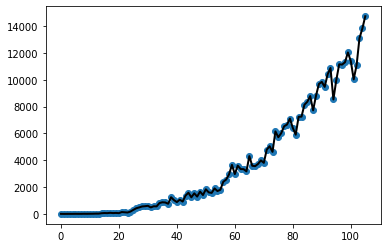

In [15]:
plt.scatter(x,y)
plt.plot(x,y,color='k',linewidth=2)
plt.show()

In [ ]:
reg.score(X,y)*100

In [227]:
reg.predict([[121]])

array([14740.])

In [228]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105])

# Random Forest Regression

# Import Libraries

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [230]:
data = pd.read_csv('Covid19India.csv')
data

,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
100279,23418,1.0,19/06/2020,NaN,NaN,NaN,Pulwama,Jammu and Kashmir,Hospitalized,19,6,2020
100280,23419,2.0,19/06/2020,NaN,NaN,NaN,Reasi,Jammu and Kashmir,Recovered,19,6,2020
100281,23420,-2.0,19/06/2020,NaN,NaN,NaN,Kishtwar,Jammu and Kashmir,Recovered,19,6,2020
100282,23421,-3.0,19/06/2020,NaN,NaN,NaN,East Sikkim,Sikkim,Recovered,19,6,2020


In [231]:
Day = data[data['Current Status'] == 'Hospitalized'].groupby(['Month', 'Day'])[['Num Cases']].sum()
Day

Num Cases
Month Day           
3     4          5.0
      5          1.0
      7          2.0
      9          4.0
      10         4.0
...              ...
6     15     10032.0
      16     11086.0
      17     13108.0
      18     13829.0
      19     14740.0

[106 rows x 1 columns]

In [232]:
x = np.arange(len(Day))
x = x.reshape(-1,1)
y = Day.values

In [233]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 300)
reg.fit(x,y)

c:\users\home\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=300)

In [234]:
reg.score(x,y)*100

99.80368919372087

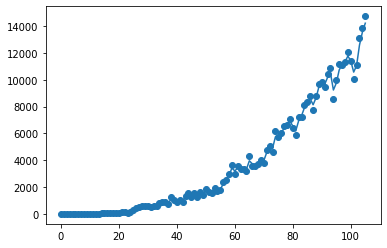

In [235]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x))
plt.show()

In [236]:
reg.predict([[121]])

array([14221.56666667])

In [ ]:
5